# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mergedf = pd.merge(study_results,mouse_metadata, on="Mouse ID" )

# Display the data table for preview
mergedf.head(15)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


In [6]:
# Checking the number of mice.
mousecount = mergedf["Mouse ID"].unique()
len(mousecount)

249

In [7]:
duplicateRows = mergedf[mergedf.duplicated(['Mouse ID', 'Timepoint'])]
duplicateRows 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateRows = mergedf[mergedf.duplicated(['Mouse ID', 'Timepoint'])]
duplicateRows 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
g989_df = mergedf.loc[mergedf["Mouse ID"] == "g989"]
g989_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mergedf.loc[mergedf["Mouse ID"] != "g989" ]
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [11]:
# Checking the number of mice in the clean DataFrame.
mousecount2 = clean_df["Mouse ID"].unique()
len(mousecount2)

248

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_clean_df = clean_df.groupby(["Drug Regimen"]).mean()
tumor_mean_df = mean_clean_df[["Tumor Volume (mm3)"]]
tumor_mean_df2 = tumor_mean_df.rename(columns={"Tumor Volume (mm3)":"Mean Tumor Volume"})
tumor_mean_df2
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
median_clean_df = clean_df.groupby(["Drug Regimen"]).median()
tumor_median_df = median_clean_df[["Tumor Volume (mm3)"]]
tumor_median_df2 = tumor_median_df.rename(columns={"Tumor Volume (mm3)":"Median Tumor Volume"})
tumor_median_df2
# Assemble the resulting series into a single summary DataFrame.
variance_clean_df = clean_df.groupby(["Drug Regimen"]).var()
tumor_variance_df = variance_clean_df[["Tumor Volume (mm3)"]]
tumor_variance_df2 = tumor_variance_df.rename(columns={"Tumor Volume (mm3)":"Tumor Volume Variance"})
tumor_variance_df2

std_clean_df = clean_df.groupby(["Drug Regimen"]).std()
tumor_std_df = std_clean_df[["Tumor Volume (mm3)"]]  
tumor_std_df2 = tumor_std_df.rename(columns={"Tumor Volume (mm3)":"Tumor Volume Std. Dev."})
tumor_std_df2

sem_clean_df = clean_df.groupby(["Drug Regimen"]).sem()
tumor_sem_df = sem_clean_df[["Tumor Volume (mm3)"]]
tumor_sem_df2 = tumor_sem_df.rename(columns={"Tumor Volume (mm3)":"Tumor Volume Std. Err."})
tumor_sem_df2

mergeddrug2 = pd.merge(tumor_mean_df2,tumor_median_df2, on="Drug Regimen" )
mergeddrug3 =pd.merge(mergeddrug2,tumor_variance_df2, on="Drug Regimen" )
mergeddrug4 =pd.merge(mergeddrug3,tumor_std_df2, on="Drug Regimen" )
mergeddrug =pd.merge(mergeddrug4,tumor_sem_df2, on="Drug Regimen" )
mergeddrug

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.


## Bar and Pie Charts

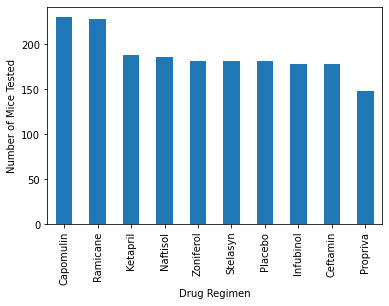

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

mousedata = clean_df["Drug Regimen"].value_counts()
barplotpandas = mousedata.plot(kind="bar", xlabel="Drug Regimen",ylabel="Number of Mice Tested")
xticklabels = mousedata.index
plt.show()

<BarContainer object of 10 artists>

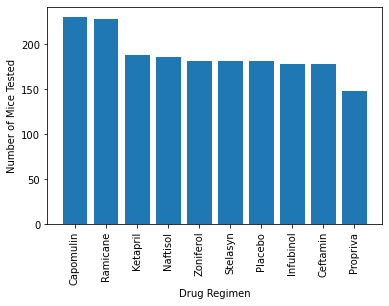

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = mousedata.index
tick_locations = [value for value in x_axis]
barplotplt = plt.bar(x_axis, mousedata)
plt.xticks(rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
barplotplt

<AxesSubplot:ylabel='Sex'>

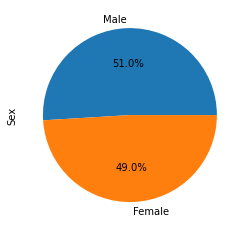

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Labels for the sections of our pie chart
labels = ["Male", "Female"]


# The colors of each section of the pie chart
colors = ["Blue", "orange"]
mousesexdata = clean_df["Sex"].value_counts()
pieplotpandas = mousesexdata.plot(kind="pie",autopct="%1.1f%%", xlabel=labels,ylabel="Sex")
pieplotpandas

([<matplotlib.patches.Wedge at 0x21f38cf2340>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')],
 [Text(-0.01804473495415389, 0.5997285948997549, '51.0%'),
  Text(0.018044734954153686, -0.5997285948997549, '49.0%')])

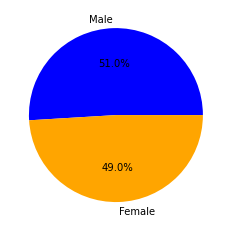

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


# Labels for the sections of our pie chart
labels = ["Male", "Female"]

# The values of each section of the pie chart
sizes = clean_df["Sex"].value_counts()

# The colors of each section of the pie chart
colors = ["Blue", "orange"]


plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%")

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
newdf = clean_df.loc[(clean_df['Drug Regimen'] == "Capomulin")|(clean_df['Drug Regimen'] == "Ramicane") |(clean_df['Drug Regimen'] == "Infubinol")|(clean_df['Drug Regimen'] == "Ceftamin"),:].copy()

# Start by getting the last (greatest) timepoint for each mouse
reduced_df = newdf[["Mouse ID","Timepoint"]]
max_timepoint = reduced_df.groupby(["Mouse ID"]).max()
max_timepoint
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Final_tumor = pd.merge(max_timepoint,clean_df, on=["Timepoint","Mouse ID"], how='inner')
Final_tumor

,Timepoint,Mouse ID,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,45,a203,67.973419,2,Infubinol,Female,20,23
1,45,a251,65.525743,1,Infubinol,Female,21,25
2,45,a275,62.999356,3,Ceftamin,Female,20,28
3,45,a411,38.407618,1,Ramicane,Male,3,22
4,45,a444,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,45,y769,68.594745,4,Ceftamin,Female,6,27
96,45,y793,31.896238,2,Capomulin,Male,17,17
97,45,y865,64.729837,3,Ceftamin,Male,23,26
98,45,z578,30.638696,0,Ramicane,Male,11,16


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = Final_tumor['Drug Regimen'].unique()

# Create empty list to fill with tumor vol data (for plotting)

tumor_volume_data = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for row in Final_tumor["Tumor Volume (mm3)"]:
        if row >= 0:
            tumor_v = row   
            tumor_volume_data.append(tumor_v)
        else:
            break
#print(tumor_volume_data)
    # add subset 
    
    
# Determine outliers using upper and lower bounds
quartiles = Final_tumor["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq  
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


Values below 3.0739668737500097 could be outliers.
Values above 94.04403868374999 could be outliers.


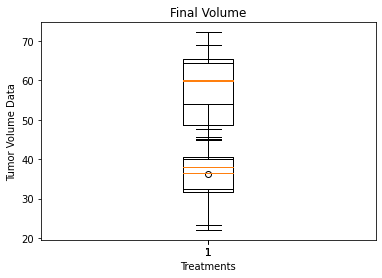

In [31]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
capomulin_df = Final_tumor.loc[(Final_tumor['Drug Regimen'] == "Capomulin")]
ramicane_df = Final_tumor.loc[(Final_tumor['Drug Regimen'] == "Ramicane")]
infubinol_df = Final_tumor.loc[(Final_tumor['Drug Regimen'] == "Infubinol")]
ceftamin_df = Final_tumor.loc[(Final_tumor['Drug Regimen'] == "Ceftamin")]

fig1, ax1 = plt.subplots()
x_axis = np.arange(0, 5, 0.1)
ax1.set_title('Final Volume')
ax1.set_ylabel('Tumor Volume Data')
ax1.set_xlabel('Treatments')
ax1.boxplot(capomulin_df["Tumor Volume (mm3)"])
ax1.boxplot(ramicane_df["Tumor Volume (mm3)"])
ax1.boxplot(infubinol_df["Tumor Volume (mm3)"])
ax1.boxplot(ceftamin_df["Tumor Volume (mm3)"])
plt.show()

## Line and Scatter Plots

In [27]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = Final_tumor.loc[(Final_tumor['Drug Regimen'] == "Capomulin")]
plt.figure()
x_axis = np.(capomulin_df['Timepoint'])
y_axis = np.(capomulin_df["Tumor Volume (mm3)"])  

plt.plot(x_axis, y_axis)


SyntaxError: invalid syntax (1771743787.py, line 4)

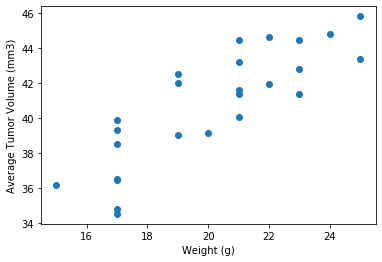

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


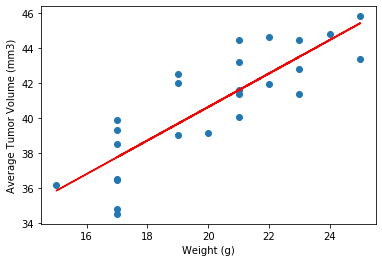

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

